In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

In [2]:
# The data path of input file
data_path = "./Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

In [3]:
#pd_data.head()

In [4]:
ProductId = pd_data['UserId']

class_userid=[]
for i in range(0, 10000):
    class_userid.append(ProductId[i])

id_dict = {}
for i in class_userid:
    # thers already exist that id in dict
    if i in id_dict:
        id_dict[i] += 1
    else:
        id_dict[i] = 1

# sort the dict to BIG TO SMALL order
sorted_list = [(k, id_dict[k]) for k in sorted(id_dict, key=id_dict.get, reverse=True)]
#print(sorted_list)

In [5]:
count = 0

# consist of UserId ProfileName UserId Score count Score
partone_UserId=[]
partone_ProfileName=[]
partone_ScoreCount=[]
partone_ScoreMean=[]

for i in list(sorted_list):
    id_int = class_userid.index(i[0])
    partone_UserId.append(pd_data['UserId'][id_int])
    partone_ProfileName.append(pd_data['ProfileName'][id_int])
    partone_ScoreCount.append(i[1])
    mean = 0
    for j in range(0, 10000):
        if pd_data['UserId'][j] == pd_data['UserId'][id_int]:
            mean = mean + pd_data['Score'][j]
    partone_ScoreMean.append(mean/i[1])
    count+=1
    if count==10:
        break
    
pd.DataFrame(
    {'UserId': partone_UserId,
     'ProfileName': partone_ProfileName,
     'ScoreCount': partone_ScoreCount,
     'ScoreMean': partone_ScoreMean
    })

,UserId,ProfileName,ScoreCount,ScoreMean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
6,A3NHUQ33CFH3VM,Citizen John,7,3.142857
7,AY12DBB0U420B,Gary Peterson,6,4.500000
8,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
9,A2R6RA8FRBS608,Matthew G. Sherwin,6,5.000000


<BarContainer object of 5 artists>

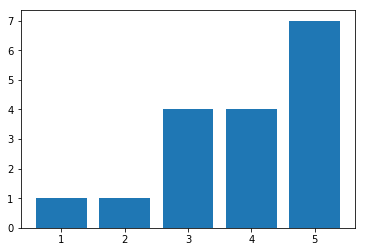

In [6]:
# the socre count of the most one (as a dict)
score_most={}

for j in range(0, 10000):
    if pd_data['UserId'][j] == partone_UserId[0]:
        if pd_data['Score'][j] in score_most:
            score_most[pd_data['Score'][j]]+=1
        else:
            score_most[pd_data['Score'][j]] = 1
score_key= []
#print(score_most)
score_key = score_most.keys()
xx=[]
for i in score_key:
    xx.append(i)
x=[]
x = sorted(xx)
y=[]
for i in x:
    y.append(score_most[i])
#print(y)
plt.bar(x, y)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
[2, 0, 0, 0, 20, 28, 122, 370, 508, 1193, 1621, 2890, 3246]


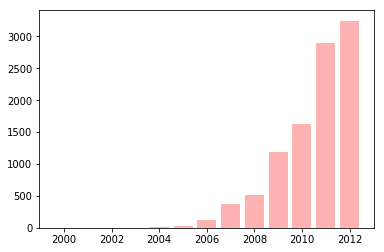

In [7]:
year_hw=[]
for j in range(0, 10000):
    date = str(pd.to_datetime(pd_data['Time'][j], unit='s'))
    year = date[0]+date[1]+date[2]+date[3]
    year_hw.append(int(year))

year_hw_x=[]
year_hw_y=[]
for j in range(2000, 2013):
    year_hw_y.append(year_hw.count(j))
    year_hw_x.append(j)
print(year_hw_x)
print(year_hw_y)
rects1 = plt.bar(year_hw_x, year_hw_y, width=0.8,alpha=0.3, color='r',label='legend1')

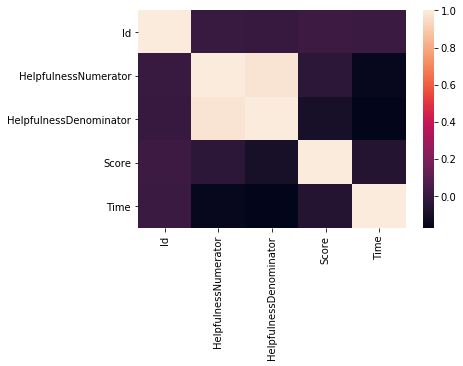

In [8]:
sns.heatmap(pd_data.corr())

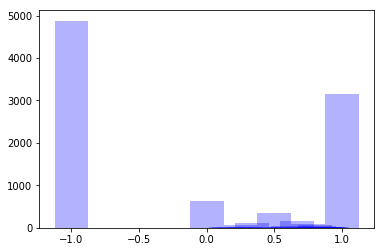

In [9]:
son = pd_data['HelpfulnessNumerator']
mom = pd_data['HelpfulnessDenominator']
hw_son = []
hw_mom = []
for i in range(0, 10000):
    hw_son.append(son[i])
    hw_mom.append(mom[i])

sonmom_ans=[]
for i in range(0, 10000):
    if int(hw_son[i])!=0 and int(hw_mom[i])!=0:
        sonmom_ans.append(hw_son[i]/hw_mom[i])
    elif int(hw_son[i])==0 and int(hw_mom[i])==0:
        sonmom_ans.append(-1)
    elif int(hw_son[i])>int(hw_mom[i]):
        sonmom_ans.append(1)
    elif int(hw_son[i])==0 and int(hw_mom[i])!=0:
        sonmom_ans.append(0)
        
#print(sonmom_ans)
partfive_x=[]
partfive_y=[]
for i in sonmom_ans:
    if i in partfive_x:
        index = partfive_x.index(i)
        partfive_y[index]+=1
    else:
        partfive_x.append(i)
        partfive_y.append(1)
#print(len(partfive_x))
#print(len(partfive_y))
#print(partfive_x)
#print(partfive_y)

rects1 = plt.bar(partfive_x, partfive_y, width=0.25,alpha=0.3, color='b',label='legend1')